In [84]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.plotly as py
%matplotlib inline
import seaborn as sns
sns.set()

In [121]:
df = pd.read_csv('CRData16.csv', skiprows=1)
df.head()

,1,01-Jan-2016 - 00:00,02-Jan-2016 - 00:00,1.2,106,74.54,16.94,60,106.1,93.2,...,80,80.1,No,Yes,No.1,No.2,0,1.1,0.1,0.2
0,2,02-Jan-2016 - 00:00,03-Jan-2016 - 00:00,1.41,97.40,106.90,18.13,70.5,97.4,126.9,...,80,80,No,No,Yes,No,0,0,1,0
1,3,03-Jan-2016 - 00:00,04-Jan-2016 - 00:00,1.57,105.33,111.02,19.63,78.5,105.3,131.0,...,80,80,No,Yes,Yes,No,0,1,1,0
2,4,04-Jan-2016 - 00:00,05-Jan-2016 - 00:00,1.55,100.08,98.43,21.46,77.5,100.1,118.4,...,80,80,No,Yes,Yes,No,0,1,1,0
3,5,05-Jan-2016 - 00:00,06-Jan-2016 - 00:00,1.57,103.88,99.67,23.80,78.5,103.9,119.7,...,80,80,No,Yes,Yes,No,0,1,1,0
4,6,06-Jan-2016 - 00:00,07-Jan-2016 - 00:00,1.30,83.88,89.37,32.41,65.0,83.9,109.4,...,80,80,No,No,Yes,No,0,0,1,0


In [122]:
df.columns = ['Si', 'FromDate', 'ToDate', 'CO','PM10','NO2','SO2','CO AQI','PM10 AQI','NO2 AQI','SO2 AQI',
              'CO Pres','PM10 Pres','NO2 Pres','SO2 Pres','CO Exceed','PM10 Exceed','NO2 Exceed','SO2 Exceed',
             'CO Y/N','PM10 Y/N','NO2 Y/N','SO2 Y/N']
df.head()

,Si,FromDate,ToDate,CO,PM10,NO2,SO2,CO AQI,PM10 AQI,NO2 AQI,...,NO2 Pres,SO2 Pres,CO Exceed,PM10 Exceed,NO2 Exceed,SO2 Exceed,CO Y/N,PM10 Y/N,NO2 Y/N,SO2 Y/N
0,2,02-Jan-2016 - 00:00,03-Jan-2016 - 00:00,1.41,97.40,106.90,18.13,70.5,97.4,126.9,...,80,80,No,No,Yes,No,0,0,1,0
1,3,03-Jan-2016 - 00:00,04-Jan-2016 - 00:00,1.57,105.33,111.02,19.63,78.5,105.3,131.0,...,80,80,No,Yes,Yes,No,0,1,1,0
2,4,04-Jan-2016 - 00:00,05-Jan-2016 - 00:00,1.55,100.08,98.43,21.46,77.5,100.1,118.4,...,80,80,No,Yes,Yes,No,0,1,1,0
3,5,05-Jan-2016 - 00:00,06-Jan-2016 - 00:00,1.57,103.88,99.67,23.80,78.5,103.9,119.7,...,80,80,No,Yes,Yes,No,0,1,1,0
4,6,06-Jan-2016 - 00:00,07-Jan-2016 - 00:00,1.30,83.88,89.37,32.41,65.0,83.9,109.4,...,80,80,No,No,Yes,No,0,0,1,0


In [124]:
df.FromDate = pd.to_datetime(df.FromDate)
df.set_index('FromDate', inplace=True)

In [125]:
#df.head()

In [126]:
#df.plot(figsize=(20,10), linewidth=5, fontsize=20)
#plt.xlabel('Months', fontsize=20);

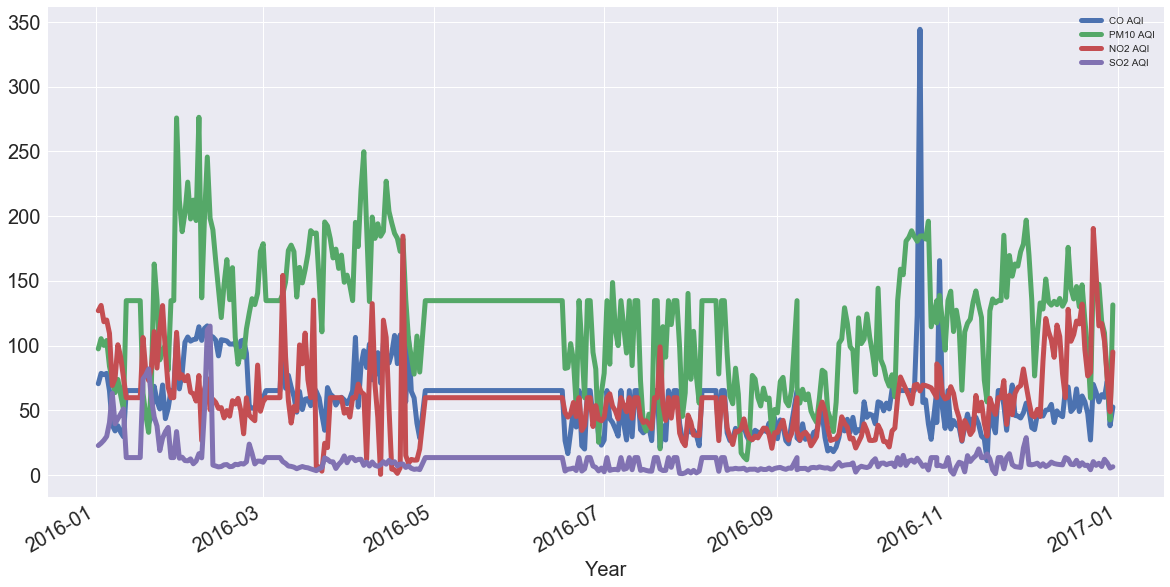

In [127]:
df['CO AQI'].plot(figsize=(20,10), linewidth=5, fontsize=20)
df['PM10 AQI'].plot(figsize=(20,10), linewidth=5, fontsize=20)
df['NO2 AQI'].plot(figsize=(20,10), linewidth=5, fontsize=20)
df['SO2 AQI'].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
plt.legend()

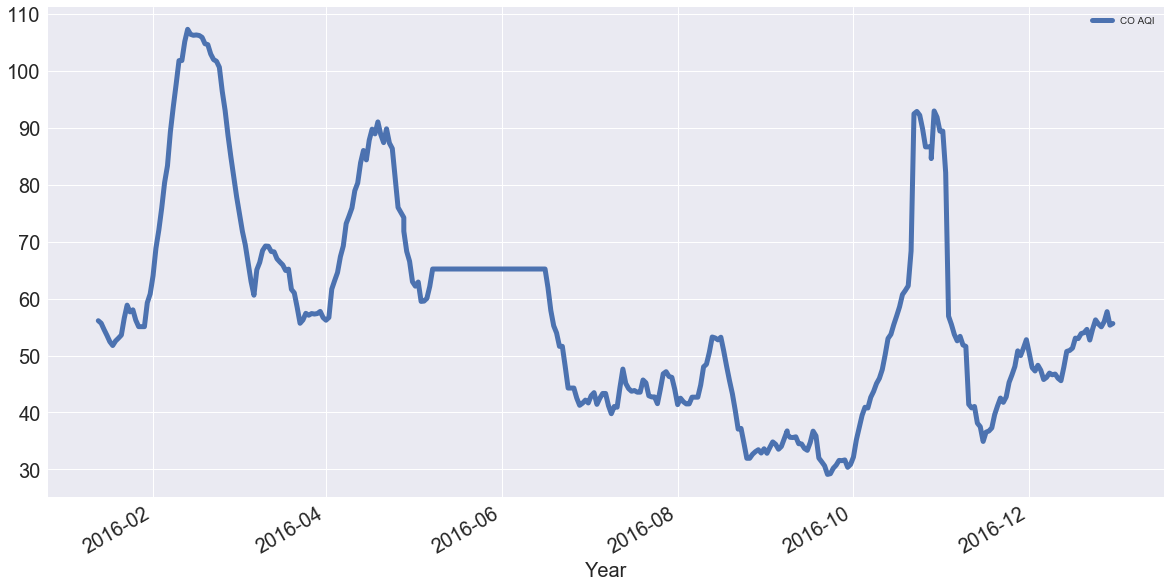

In [128]:
COAQI = df[['CO AQI']]
COAQI.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Text(0.5,1,'Rolling Average for 2016 CR')

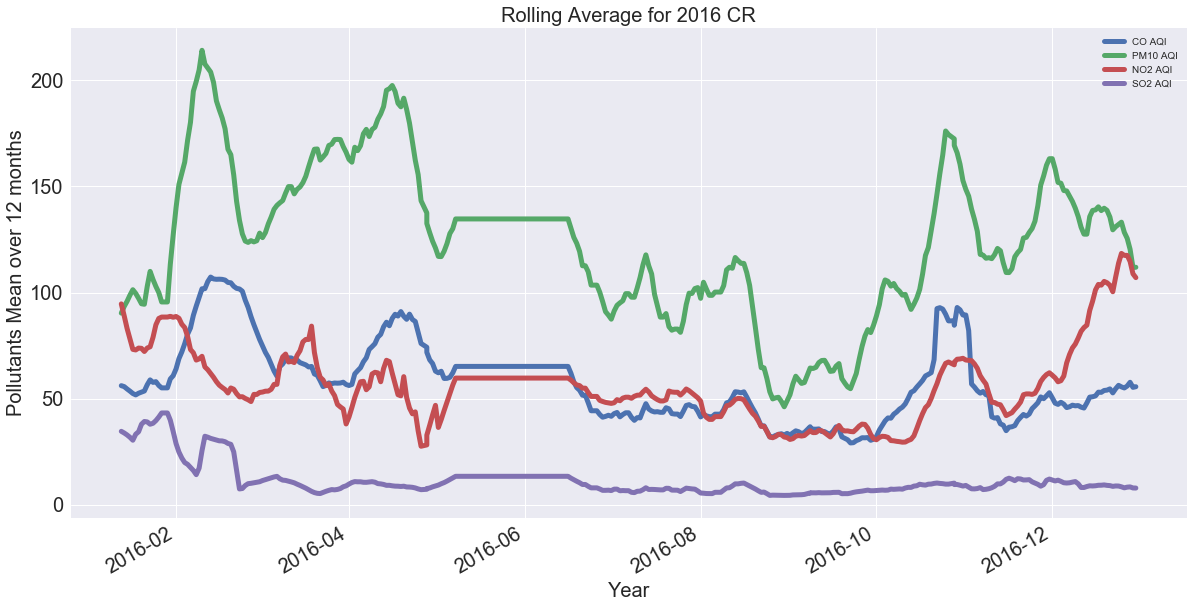

In [129]:
PM10AQI = df[['PM10 AQI']]
NO2AQI = df[['NO2 AQI']]
SO2AQI = df[['SO2 AQI']]
df_rm = pd.concat([COAQI.rolling(12).mean(), PM10AQI.rolling(12).mean(), NO2.rolling(12).mean(), SO2.rolling(12).mean()], axis=1)
df_rm.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
plt.ylabel('Pollutants Mean over 12 months', fontsize=20)
plt.title('Rolling Average for 2016 CR', fontsize=20)

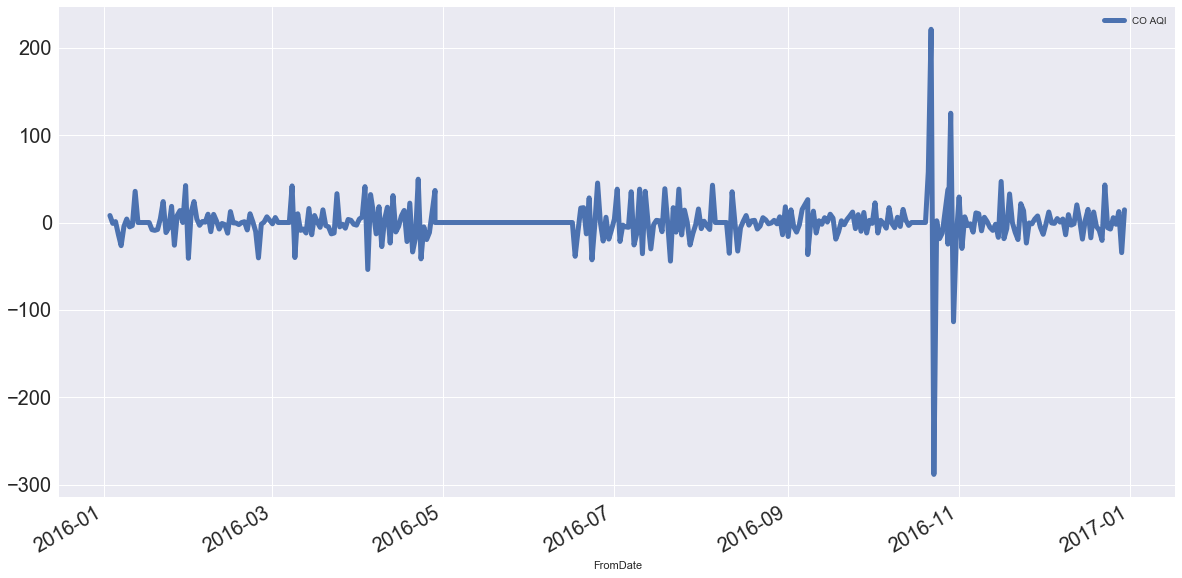

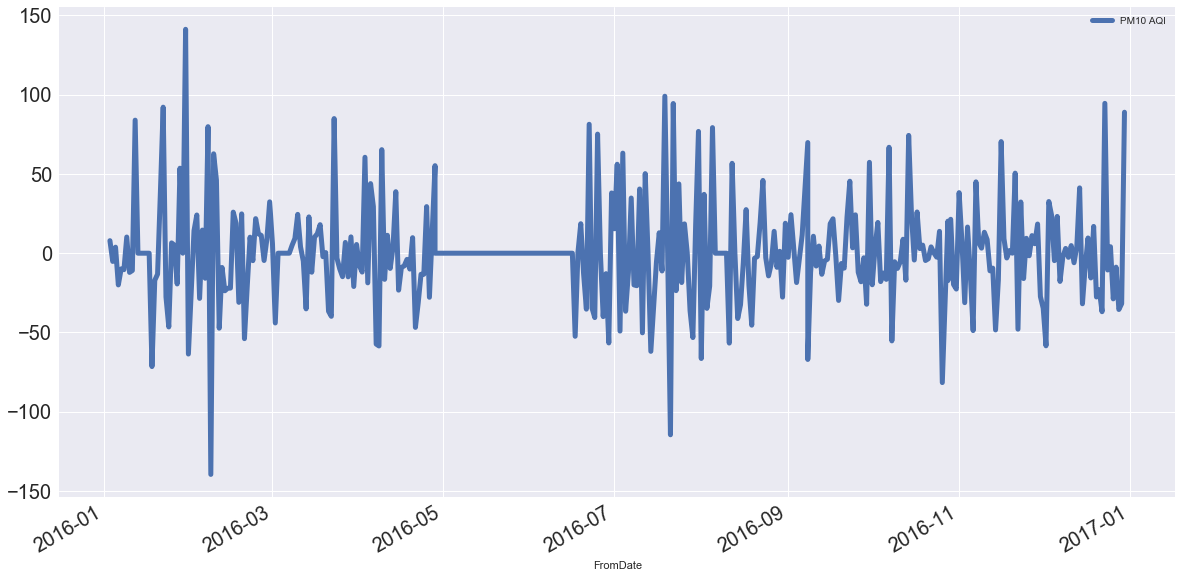

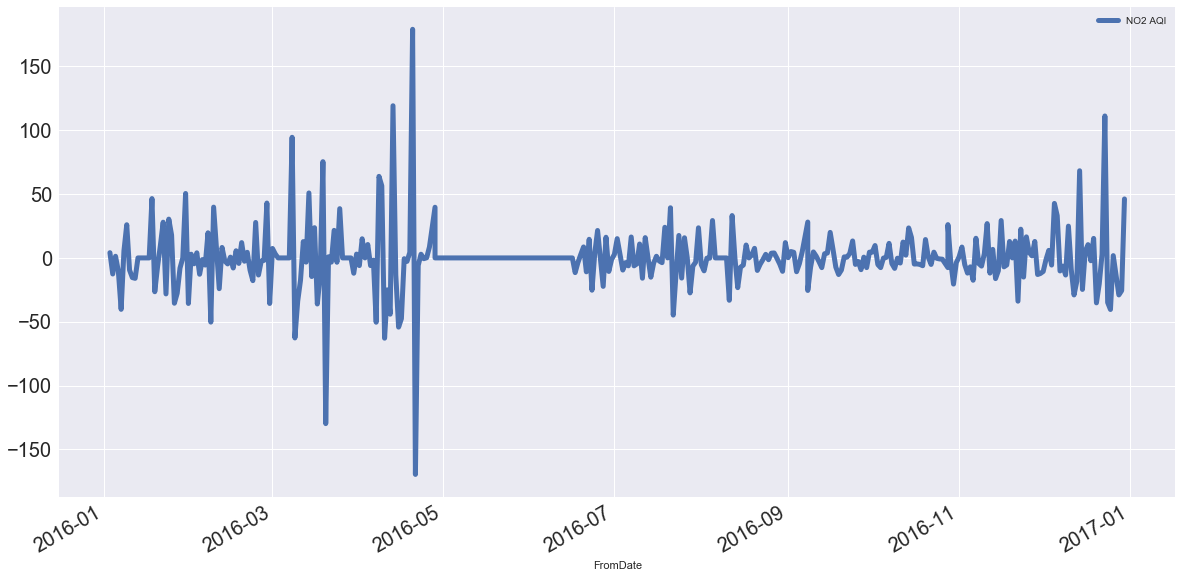

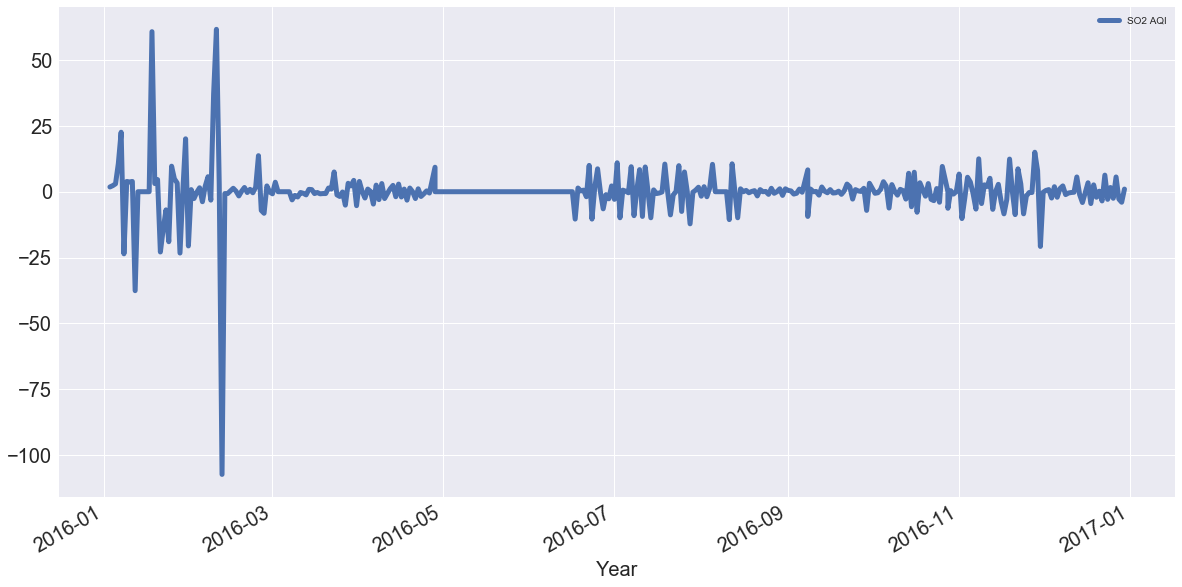

In [130]:
COAQI.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
PM10AQI.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
NO2AQI.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
SO2AQI.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Text(0.5,1,'Actual correlation')

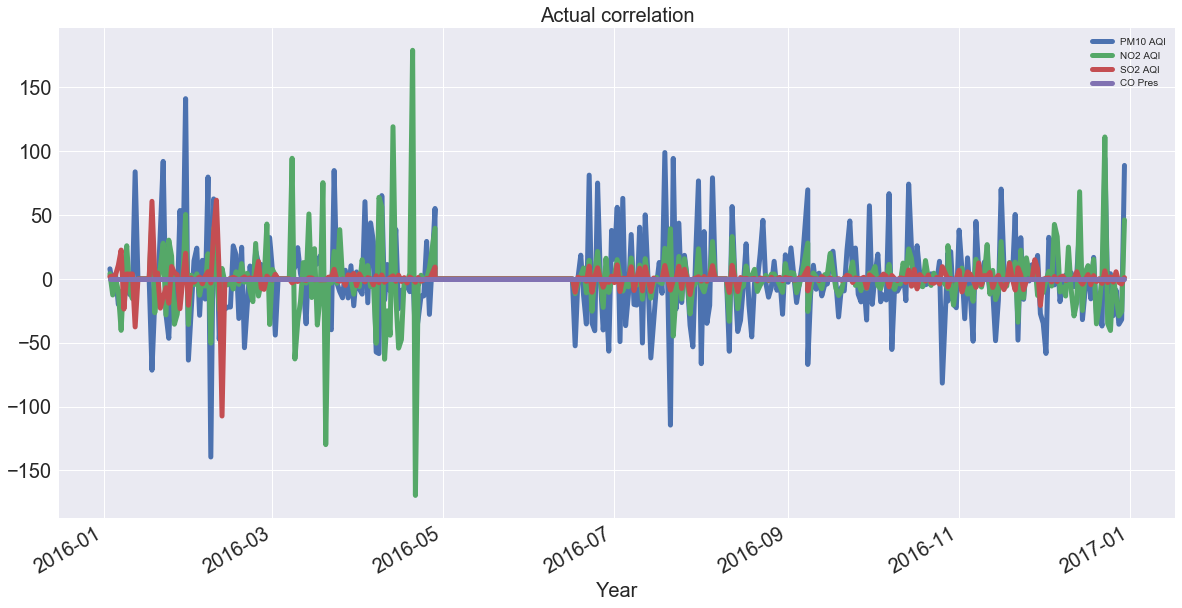

In [131]:
df1 = df.iloc[:,[7,8,9,10]]
df1.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
plt.title('Actual correlation', fontsize=20)